In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings("ignore")

In [78]:
dados = pd.read_csv('dados.csv')

In [79]:
dados = dados.replace(np.NaN,0)
dados.head()

,Dias,Confirmados,Óbitos,Novos por Dia,Óbitos por dia,Semana,Conf/Semana,Obt/Semana,Novos/Semana,Unnamed: 9,Novos/Dia,Óbitos/Dia
0,18/03,0,0.0,0,0.0,Semana 12,4.0,0.0,4.0,0.0,897.0,24.0
1,19/03,3,0.0,3,0.0,Semana 13,11.0,1.0,7.0,0.0,0.0,0.0
2,20/03,4,0.0,1,0.0,Semana 14,24.0,4.0,13.0,0.0,0.0,0.0
3,21/03,4,0.0,0,0.0,Semana 15,47.0,7.0,23.0,0.0,0.0,0.0
4,22/03,6,0.0,2,0.0,Semana 16,144.0,10.0,97.0,0.0,0.0,0.0


In [80]:
def getcolumn(df,column,verbose=0): #Retorna o X e  y respectivamente
    X, y = df[column].index.ravel().reshape(-1,1), df[column].values.ravel().reshape(-1,1)
    if verbose:
        print("column: {} CSV X shape: {} Max: {} Min: {}".format(column,X.shape,X.max(),X.min()))
        print("column: {} CSV y shape: {} Max: {} Min: {}".format(column,y.shape,y.max(),y.min()))
    return X,y

In [81]:
column = 'Confirmados'
X, y =  getcolumn(dados,column,verbose=1)

column: Confirmados CSV X shape: (112, 1) Max: 111 Min: 0
column: Confirmados CSV y shape: (112, 1) Max: 28411 Min: 0


In [82]:
def getXy_train_test(X,y,mode='30'):
    
    print('lenX: {} leny: {}'.format(len(X),len(y)))
    
    if mode == 'train_test_split':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
        print('Mode: {} X_train: {} X_test: {} y_train: {} y_test: {}'.format(mode,len(X_train), len(X_test), len(y_train), len(y_test)))
        return X_train, X_test, y_train, y_test
    
    elif int(mode) <= len(X):
        X_train, X_test, y_train, y_test = X[:-int(mode)],X[-int(mode):],y[:-int(mode)],y[-int(mode):]
        print('Mode: {} dias X_train: {} X_test: {} y_train: {} y_test: {}'.format(mode,len(X_train), len(X_test), len(y_train), len(y_test)))
        return X_train, X_test, y_train, y_test
    else:
        print('mode Non')
        return 0,0,0,0

In [83]:
def showPred(X_train, X_test, y_train, y_test=None,show=True):
    
    degree = 4

    modelo_polinomial = make_pipeline(PolynomialFeatures(degree), Ridge())
    modelo_polinomial.fit(X_train, y_train)

    pred_values = modelo_polinomial.predict(X_test)
    pred = np.int_(pred_values)

    if not show:
        return pred
    
    plt.scatter(X_train,y_train,label=str(len(y_train))+" dias de treino")
    plt.scatter(X_test,y_test,color='red',label=str(len(X_test))+" dias de casos reais")
    plt.scatter(X_test,pred,color='pink',label=str(len(pred))+" dias de predição")
    plt.legend()
    plt.show()

lenX: 112 leny: 112
Mode: 3 dias X_train: 109 X_test: 3 y_train: 109 y_test: 3


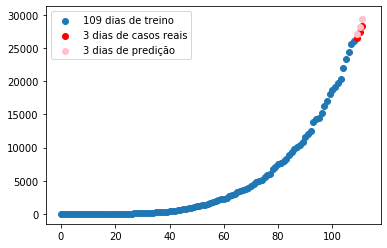

In [84]:
X_train, X_test, y_train, y_test = getXy_train_test(X,y,mode='3')
showPred(X_train, X_test, y_train, y_test)

lenX: 112 leny: 112
Mode: 7 dias X_train: 105 X_test: 7 y_train: 105 y_test: 7


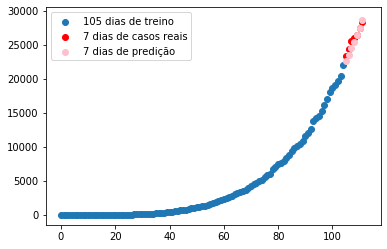

In [85]:
X_train, X_test, y_train, y_test = getXy_train_test(X,y,mode='7')
showPred(X_train, X_test, y_train, y_test)

lenX: 112 leny: 112
Mode: 14 dias X_train: 98 X_test: 14 y_train: 98 y_test: 14


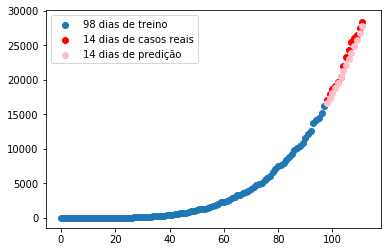

In [86]:
X_train, X_test, y_train, y_test = getXy_train_test(X,y,mode='14')
showPred(X_train, X_test, y_train, y_test)

lenX: 112 leny: 112
Mode: 21 dias X_train: 91 X_test: 21 y_train: 91 y_test: 21


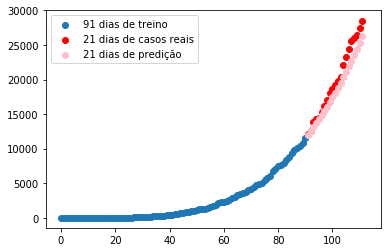

In [87]:
X_train, X_test, y_train, y_test = getXy_train_test(X,y,mode='21')
showPred(X_train, X_test, y_train, y_test)

lenX: 112 leny: 112
Mode: 30 dias X_train: 82 X_test: 30 y_train: 82 y_test: 30


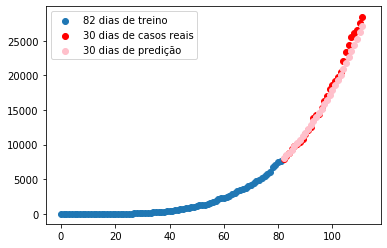

In [88]:
X_train, X_test, y_train, y_test = getXy_train_test(X,y,mode='30')
showPred(X_train, X_test, y_train, y_test)

lenX: 112 leny: 112
Mode: 45 dias X_train: 67 X_test: 45 y_train: 67 y_test: 45


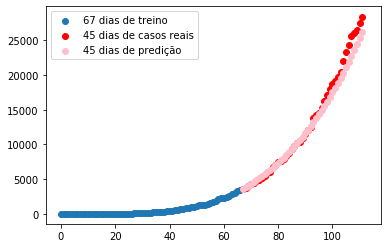

In [89]:
X_train, X_test, y_train, y_test = getXy_train_test(X,y,mode='45')
showPred(X_train, X_test, y_train, y_test)

In [90]:
def showPredFull(df,mode=30,name='Confirmados',show=True): 
    X_train, y_train = getcolumn(df,name,verbose=1)
    x_max = X_train.max()
    X_test = np.asarray(range(x_max,x_max+mode)).reshape(-1,1)
    pred = showPred(X_train, X_test, y_train, y_test,show=False)
    
    if not show:
        return pred
    
    plt.scatter(X_train,y_train,label=str(len(y_train))+" dias de treino")
    plt.scatter(X_test,pred,color='pink',label=str(len(pred))+" dias de predição")
    plt.legend()
    plt.show()

column: Confirmados CSV X shape: (112, 1) Max: 111 Min: 0
column: Confirmados CSV y shape: (112, 1) Max: 28411 Min: 0


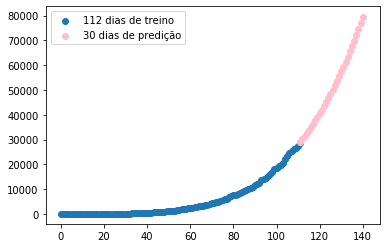

In [91]:
showPredFull(dados,mode=30,name=column,show=True)